# Embedding effect on ESN - IMDB dataset

## Librairies

- Needs ``matplotlib``

Install it from command line if necessary

In [1]:
import io
import os
import re
import sys

In [2]:
import pickle
import time
from timeit import default_timer as timer

import numpy as np
import random

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Plots

In [8]:
# TREC-6
time_d1 = {
    'RR-baseline': (7.32, 0), 
    'ESN': (16.24, 0.38),
    'Bi-LSTM': (97.02, 0),
    'BERT_ft': (556.38, 0),
}

# TREC-50
time_d2 = {
    'RR-baseline': (8.16, 0), 
    'ESN': (19.91, 0.46),
    'Bi-LSTM': (95.92, 0),
    'BERT_ft': (549.17, 0),
}

# SST-2
time_d3 = {
    'RR-baseline': (105.52, 0), 
    'ESN': (121.94, 1.37),
    'Bi-LSTM': (1201.88, 0),
    'BERT_ft': (4065.53, 0),
}

# IMDB
time_d4 = {
    'RR-baseline': (97.09, 0), 
    'ESN': (192.48, 0.30),
    'Bi-LSTM': (1630.05, 0),
    'BERT_ft': (6235.73, 0),
}

# AG NEWS
time_d5 = {
    'RR-baseline': (153.58, 0), 
    'ESN': (304.08, 5.17),
    'Bi-LSTM': (2855.07, 0),
    'BERT_ft': (64566.63, 0),
}


time_d = {'TREC-6': time_d1, 
          'TREC-50': time_d2,
          'SST-2': time_d3,  
          'IMDB': time_d4,
          'AG-NEWS': time_d5}

In [9]:
time_acc_d = {k: [x[0] for x in time_d[k].values()] for k in time_d.keys()}
time_acc_d

{'TREC-6': [7.32, 16.24, 97.02, 556.38],
 'TREC-50': [8.16, 19.91, 95.92, 549.17],
 'SST-2': [105.52, 121.94, 1201.88, 4065.53],
 'IMDB': [97.09, 192.48, 1630.05, 6235.73],
 'AG-NEWS': [153.58, 304.08, 2855.07, 64566.63]}

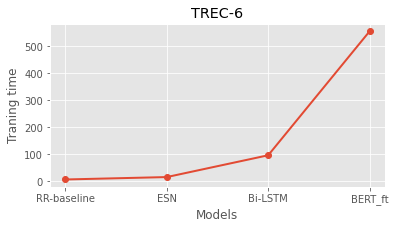

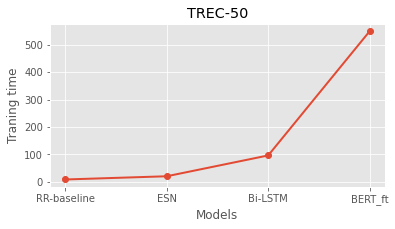

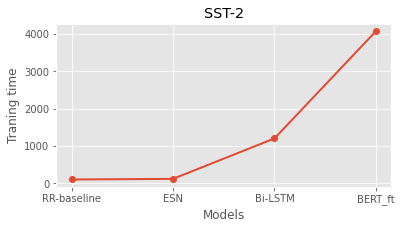

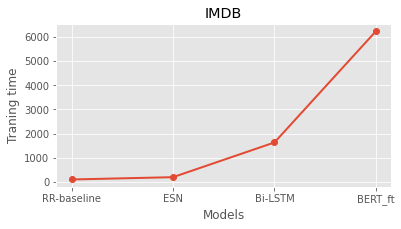

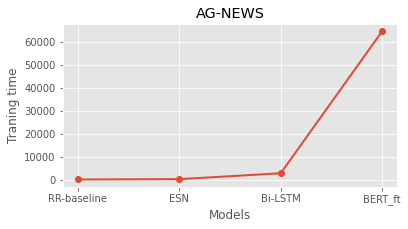

In [10]:
models = time_d['TREC-6'].keys()
time_acc_d = {k: [x[0] for x in time_d[k].values()] for k in time_d.keys()}
time_std_d = {k: [x[1] for x in time_d[k].values()] for k in time_d.keys()}

for k in time_d.keys():

    TITLE = k

    fig, ax = plt.subplots(figsize=(6,3))

    # ax.errorbar(range(len(acc_d)), acc_l, yerr=std_l, fmt='-', color='C1', linewidth=2)
    ax.plot(range(len(time_acc_d[k])), time_acc_d[k], marker='o', color='C0', linewidth=2)

    ax.set_title(TITLE)

    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models)

    ax.set_xlabel('Models')
    ax.set_ylabel('Traning time')

    plt.savefig("plots/"+TITLE+"_time.pdf", bbox_inches='tight', dpi=300)
    plt.show()